In [2]:
import matplotlib.pyplot as plt
import torch
import os
device = torch.device("mps") if torch.backends.mps.is_available() else (
    torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
)
print(f"Using device: {device}")

Using device: mps


In [21]:
def extract_values_from_file(name: str):
    # file_name = f"./models/{name_file}_lr_{lr}_wd_{wd}.pth"
    name_file = name.split("_")[0]
    lr = name.split("_lr_")[1].split('_')[0]

    wd_arr = name.split("_")[-1].split(".")
    if len(wd_arr) > 1 and wd_arr[1] != "pth":
        wd = f'{wd_arr[0]}.{wd_arr[1]}'
    else:
        wd = wd_arr[0]
    return {"name": name_file, "lr": lr, "weight_decay": wd, "file": name}


report = []
for file_name in os.listdir('models'):
    checkpoint = torch.load(f'models/{file_name}', map_location=torch.device(device))
    # model_state_dict = checkpoint.get("model_state_dict", None)  # Model weights
    data = dict(checkpoint)
    # remove the model_state_dict and optimizer_state_dict
    data.pop("model_state_dict")
    data.pop("optimizer_state_dict")
    value_name = extract_values_from_file(file_name)

    report.append({
        "file_name": f"{value_name['name']}({value_name['lr']}, {value_name['weight_decay']})",
        "acc": data['acc'],
        "loss": data['loss'],   
    })



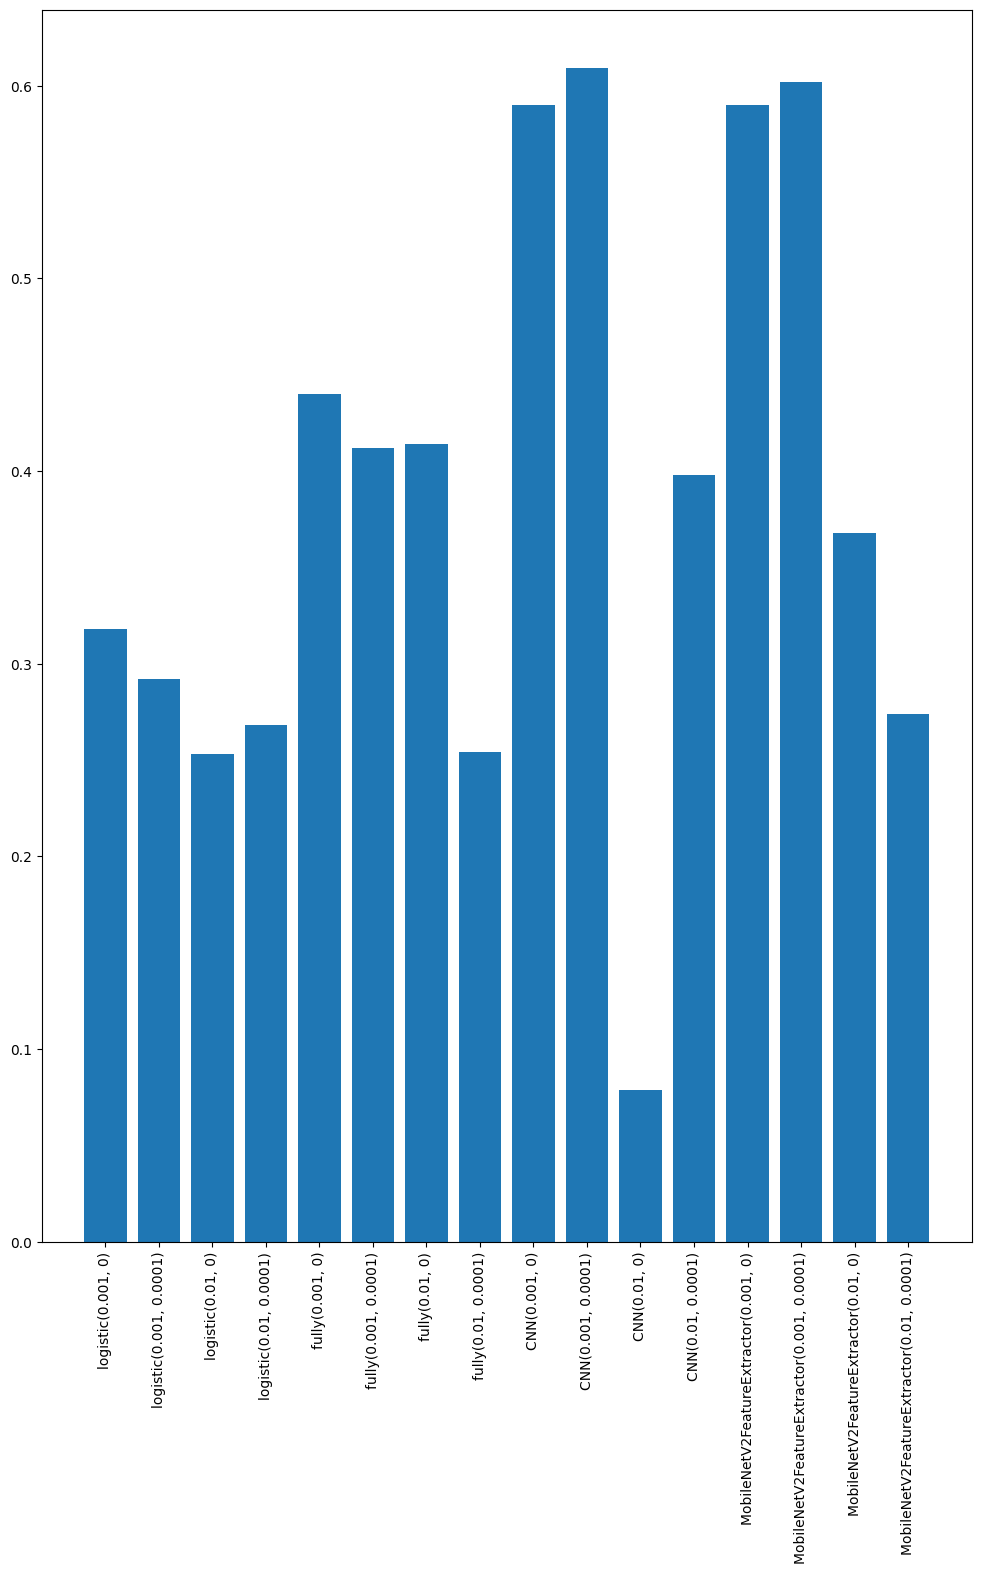

In [23]:
# create a bar chart of the accuracy with the file name as the x-axis
fig, ax = plt.subplots(figsize=(12, 16))
ax.bar([r['file_name'] for r in report], [r['acc'] for r in report])
plt.xticks(rotation=90)
plt.savefig('accuracy.png')


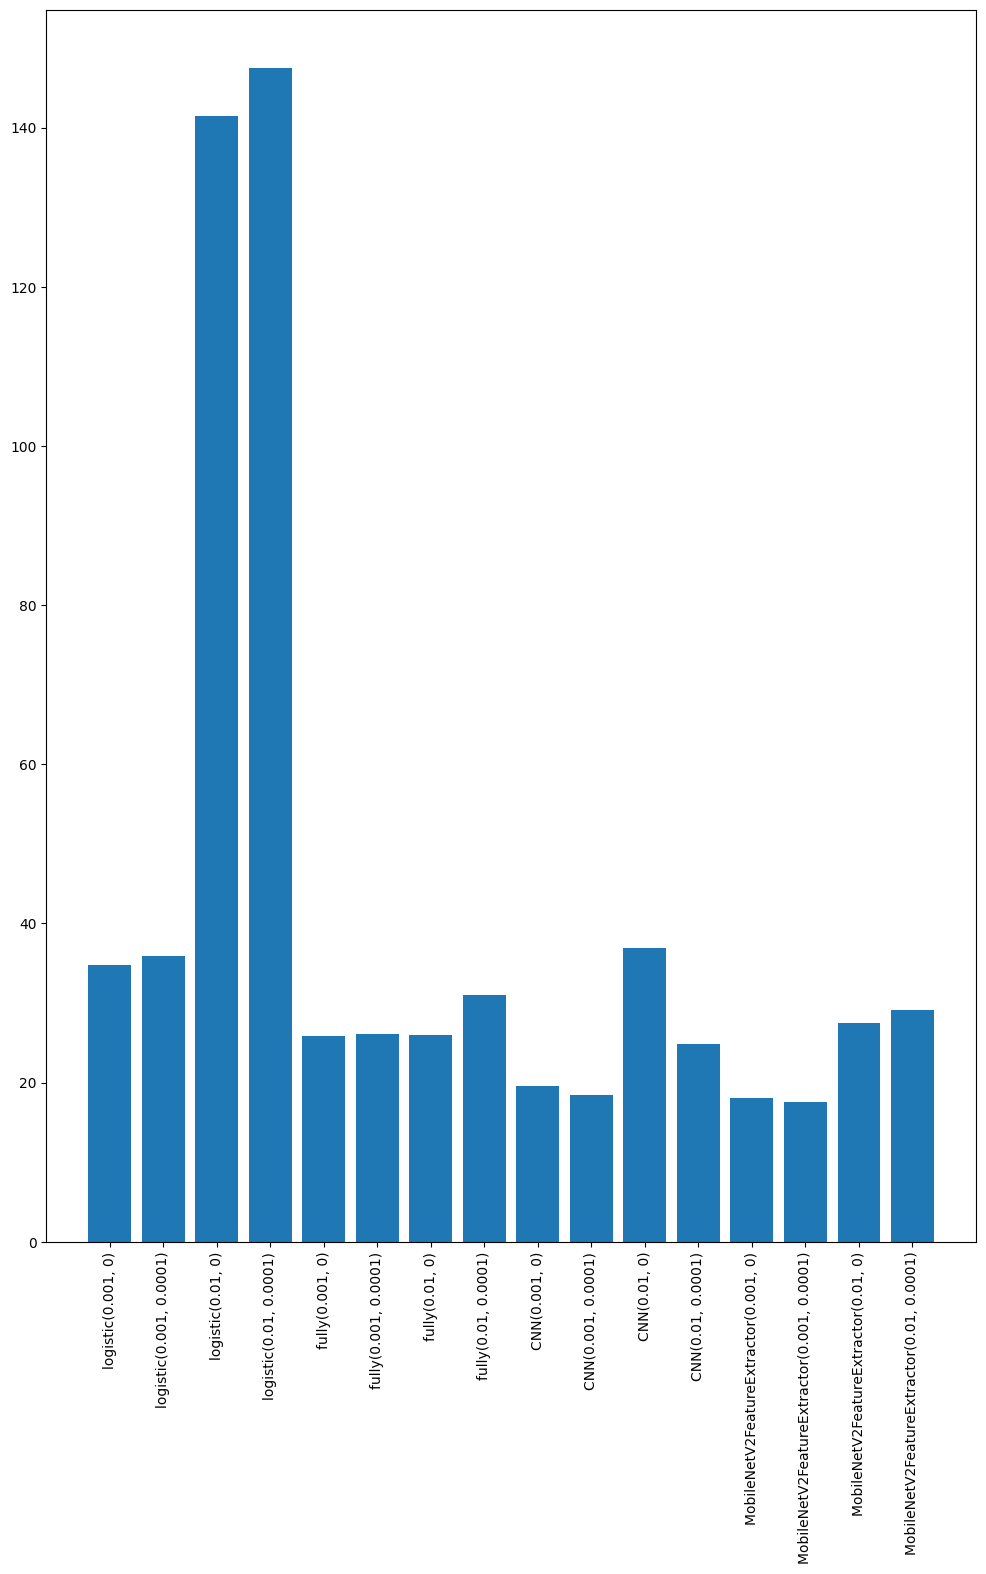

In [24]:
# create a bar chart of the accuracy with the file name as the x-axis
fig, ax = plt.subplots(figsize=(12, 16))
ax.bar([r['file_name'] for r in report], [r['loss'] for r in report])
plt.xticks(rotation=90)
plt.savefig('loss.png')
